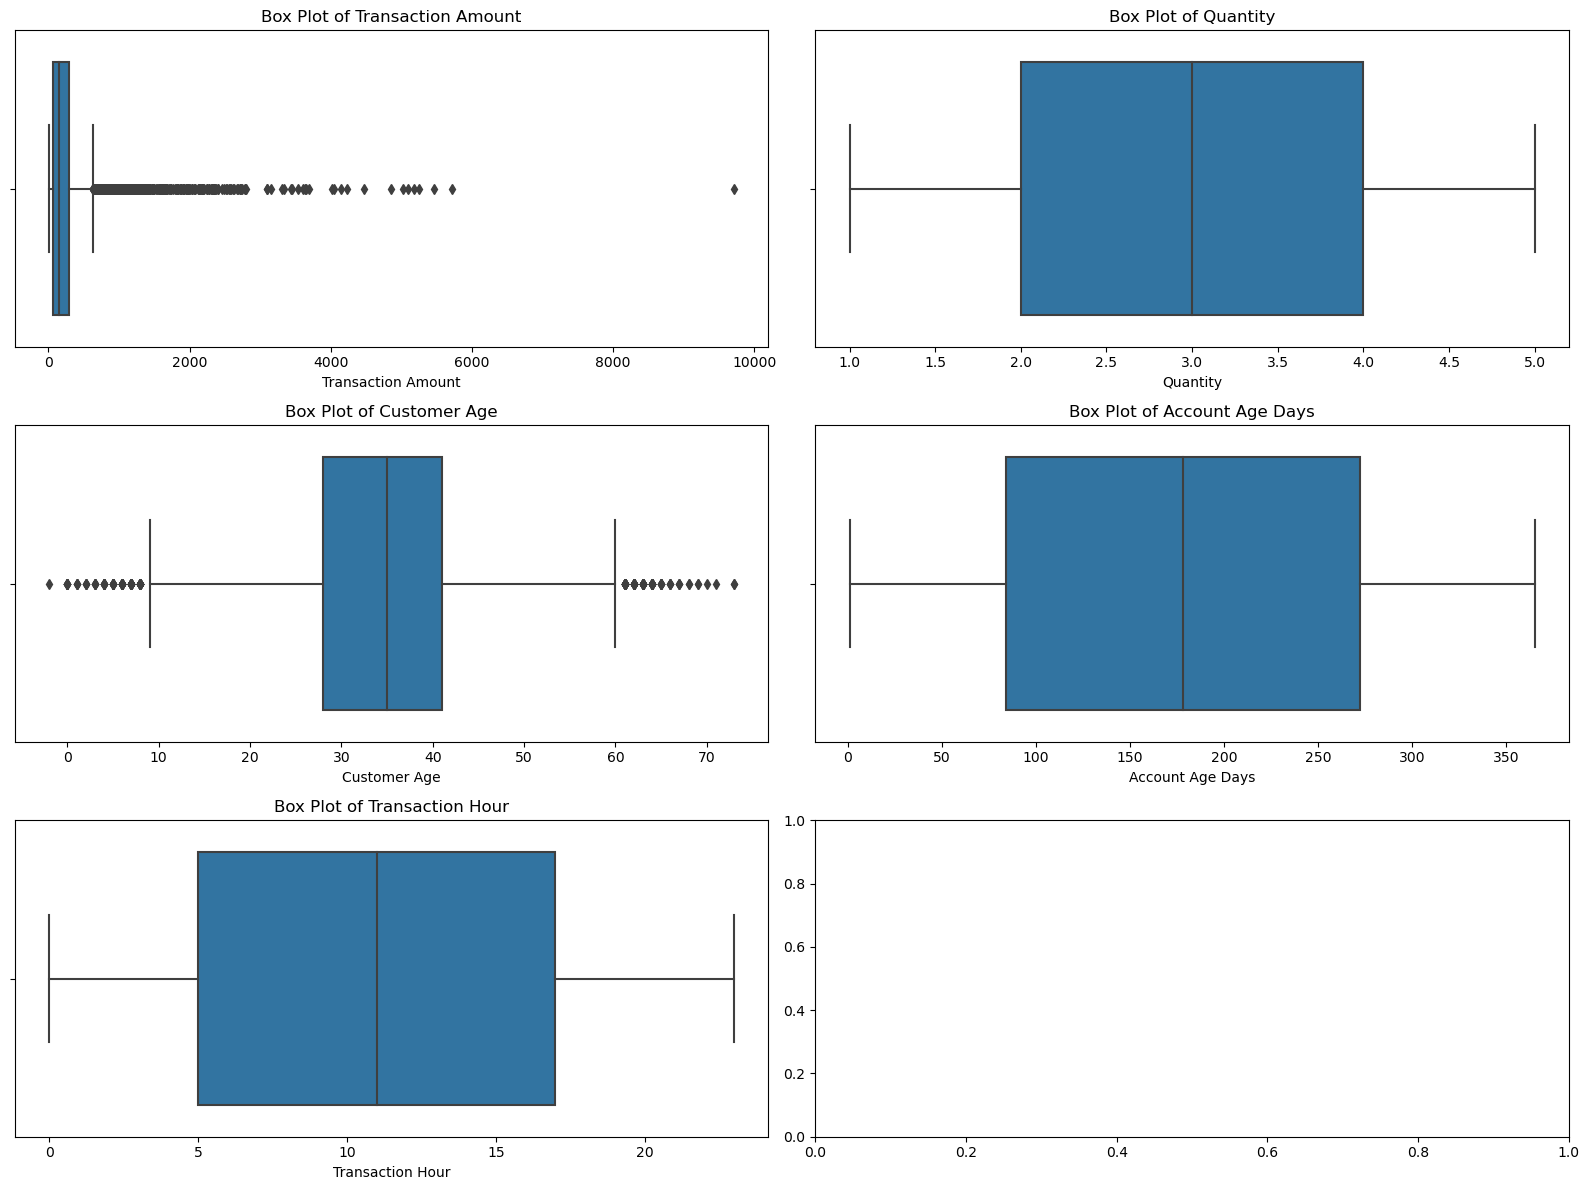

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSea rchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint, uniform
df = pd.read_csv("C:/Users/0rame/Desktop/ML_tutorials/internship/Datas/Fraudulent_E-Commerce_Transaction_Data_2.csv")
df.describe()
features = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()
df.info()
mean_age = df['Customer Age'].mean()
df.loc[df['Customer Age'] < 10, 'Customer Age'] = mean_age
df.describe()
df['Address Match'] = (df['Shipping Address'] == df['Billing Address']).astype(int)
df = df.drop(["Transaction ID","Customer ID","Customer Location","Transaction Date","IP Address","Shipping Address","Billing Address"], axis=1)

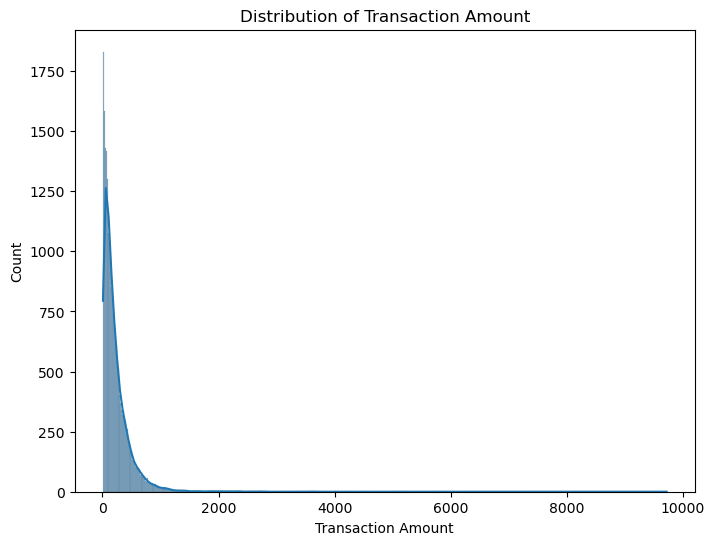

In [2]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Transaction Amount'], kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amount')
plt.show()

In [3]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,42.32,PayPal,electronics,1,40.0,desktop,0,282,23,1
1,301.34,credit card,electronics,3,35.0,tablet,0,223,0,1
2,340.32,debit card,toys & games,5,29.0,desktop,0,360,8,0
3,95.77,credit card,electronics,5,45.0,mobile,0,325,20,1
4,77.45,credit card,clothing,5,42.0,desktop,0,116,15,1


In [4]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

df['Payment Method'].value_counts()
df['Payment Method'] = df['Payment Method'].map({"debit card":0,"credit card":1,"PayPal":2,"bank transfer":3})
df['Product Category'] = df['Product Category'].map({"home & garden":0,"electronics":1,"toys & games":2,"clothing":3,"health & beauty":4})
df['Device Used'] = df['Device Used'].map({"desktop":0,"mobile":1,"tablet":2,})
new_column_order = ['Transaction Amount', 'Payment Method', 'Product Category', 'Quantity',
                   'Customer Age', 'Device Used','Address Match' , 'Account Age Days',
                   'Transaction Hour','Is Fraudulent']
df = df.reindex(columns=new_column_order)
df
numeric_features = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head()
X = df.drop('Is Fraudulent', axis=1)
y = df['Is Fraudulent']
X.shape, y.shape
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled.shape,y_resampled.shape)
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)
print(X_under_resampled.shape,y_under_resampled.shape)
print(y_resampled.value_counts())
print(y_under_resampled.value_counts())
X_train,X_test,y_train,y_test = train_test_split(X_under_resampled,y_under_resampled,test_size=0.2,random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
# SMOTE
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

(44824, 9) (44824,)
(2444, 9) (2444,)
Is Fraudulent
0    22412
1    22412
Name: count, dtype: int64
Is Fraudulent
0    1222
1    1222
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       248
           1       0.75      0.74      0.74       241

    accuracy                           0.75       489
   macro avg       0.75      0.75      0.75       489
weighted avg       0.75      0.75      0.75       489

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4555
           1       0.96      0.96      0.96      4410

    accuracy                           0.96      8965
   macro avg       0.96      0.96      0.96      8965
weighted avg       0.96      0.96      0.96      8965



In [5]:
import pickle
pickle.dump(model,open('rfc_fraud_model.pkl','wb'))

In [6]:
X_train.columns

Index(['Transaction Amount', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Device Used', 'Address Match', 'Account Age Days',
       'Transaction Hour'],
      dtype='object')

In [7]:
y_train.value_counts()

Is Fraudulent
1    18002
0    17857
Name: count, dtype: int64

In [8]:
X_train

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Address Match,Account Age Days,Transaction Hour
6165,0.292450,3,1,-1.409202,1.052538,1,1,-0.276204,0.391660
27466,-0.415803,3,1,0.942531,-0.178694,1,1,-0.353431,-1.087144
17162,-0.233112,0,2,1.408427,-1.717733,1,1,-1.216732,0.534916
44635,-0.162514,1,0,-0.585030,1.449635,2,1,-1.307250,-1.135443
6052,0.133041,3,1,-1.409202,-0.383899,2,1,-1.402976,0.534916
...,...,...,...,...,...,...,...,...,...
11284,-0.762326,3,4,-0.704795,1.052538,2,1,-1.198108,-0.324620
44732,-0.346003,0,0,1.408427,-0.083811,2,1,1.000098,-1.040900
38158,0.248675,2,2,-1.232958,-0.255625,2,1,-1.320346,0.320090
860,-0.556292,0,3,-0.704795,0.436922,1,1,-0.164458,0.534916


In [9]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Address Match,Account Age Days,Transaction Hour,Is Fraudulent
0,-0.663192,2,1,-1.409202,0.539525,0,1,0.962314,1.680964,0
1,0.255186,1,1,-0.000387,0.026512,2,1,0.412896,-1.613924,0
2,0.393393,0,2,1.408427,-0.589104,0,0,1.688663,-0.467876,0
3,-0.473680,1,1,1.408427,1.052538,1,1,1.362737,1.251196,0
4,-0.538635,1,3,1.408427,0.744730,0,1,-0.583505,0.534916,0


In [10]:
df[df['Is Fraudulent'] == 1]

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Address Match,Account Age Days,Transaction Hour,Is Fraudulent
36,-0.026121,3,0,-1.409202,1.668154,2,1,0.142844,-1.040900,1
115,0.276566,3,0,-0.704795,-0.281296,0,1,-0.117897,1.107940,1
169,-0.479140,3,4,0.704020,-0.896912,2,1,-1.412288,0.391660,1
204,-0.561753,2,0,0.704020,1.770757,2,1,0.031098,-1.613924,1
206,4.383349,0,2,1.408427,2.386373,0,1,-0.350701,-1.327412,1
...,...,...,...,...,...,...,...,...,...,...
23527,8.859831,1,4,-0.000387,-0.691707,1,1,-1.635780,-1.613924,1
23552,0.426651,3,3,-0.000387,-2.435952,2,1,-1.570595,0.678172,1
23558,-0.350365,0,4,0.704020,1.360346,2,1,-1.579907,-1.613924,1
23561,-0.459888,3,4,-0.704795,-0.076091,2,1,-1.412288,1.107940,1


In [11]:
# Mapping dictionaries
payment_method_map = {"debit card": 0, "credit card": 1, "PayPal": 2, "bank transfer": 3}
product_category_map = {"home & garden": 0, "electronics": 1, "toys & games": 2, "clothing": 3, "health & beauty": 4}
device_used_map = {"desktop": 0, "mobile": 1, "tablet": 2}

# Reverse mapping dictionaries
reverse_payment_method_map = {v: k for k, v in payment_method_map.items()}
reverse_product_category_map = {v: k for k, v in product_category_map.items()}
reverse_device_used_map = {v: k for k, v in device_used_map.items()}

# Get classes of categorical columns
payment_method_classes = reverse_payment_method_map.items()
product_category_classes = reverse_product_category_map.items()
device_used_classes = reverse_device_used_map.items()

print("Payment Method Classes:", payment_method_classes)
print("Produt Category Classes:", product_category_classes)
print("Device Used Classes:", device_used_classes)

Payment Method Classes: dict_items([(0, 'debit card'), (1, 'credit card'), (2, 'PayPal'), (3, 'bank transfer')])
Produt Category Classes: dict_items([(0, 'home & garden'), (1, 'electronics'), (2, 'toys & games'), (3, 'clothing'), (4, 'health & beauty')])
Device Used Classes: dict_items([(0, 'desktop'), (1, 'mobile'), (2, 'tablet')])
